22:01 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
/home/thomas.ng/.conda/envs/jim/lib/python3.11/site-packages/lalsimulation/lalsimulation.py:8: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


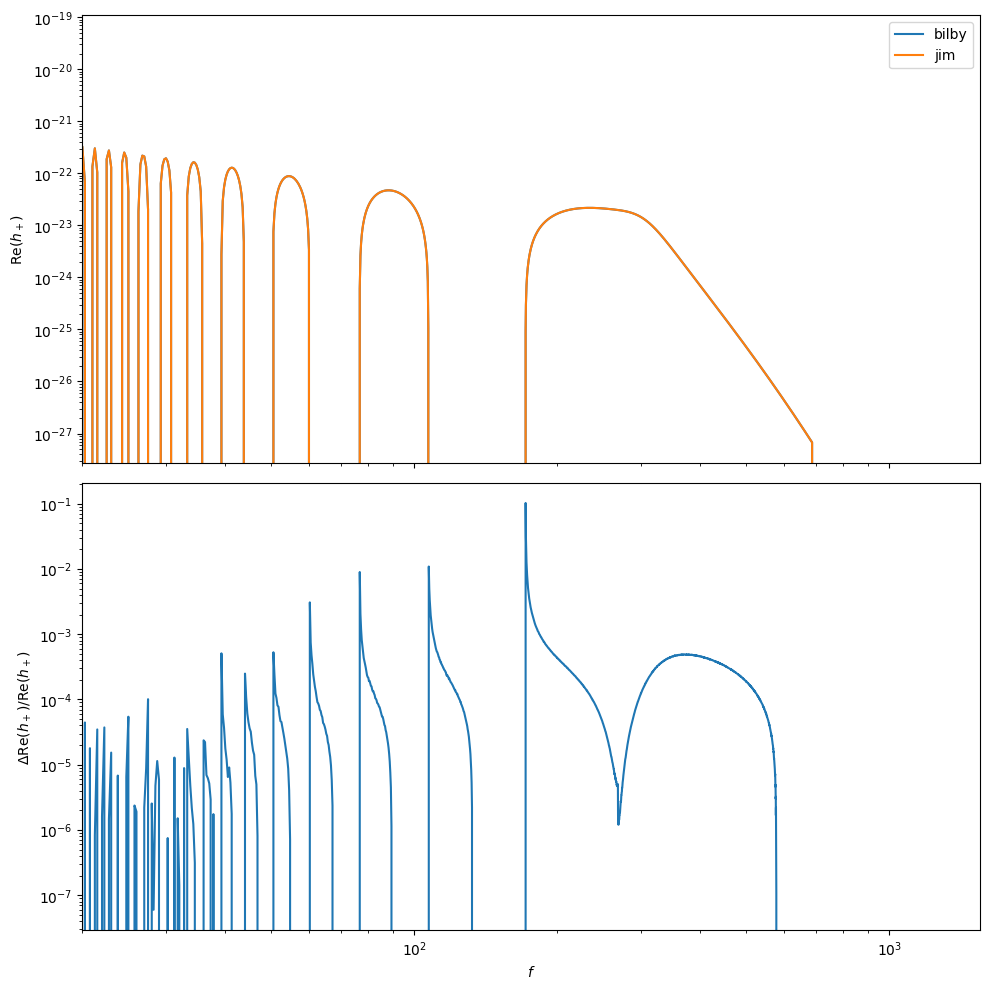

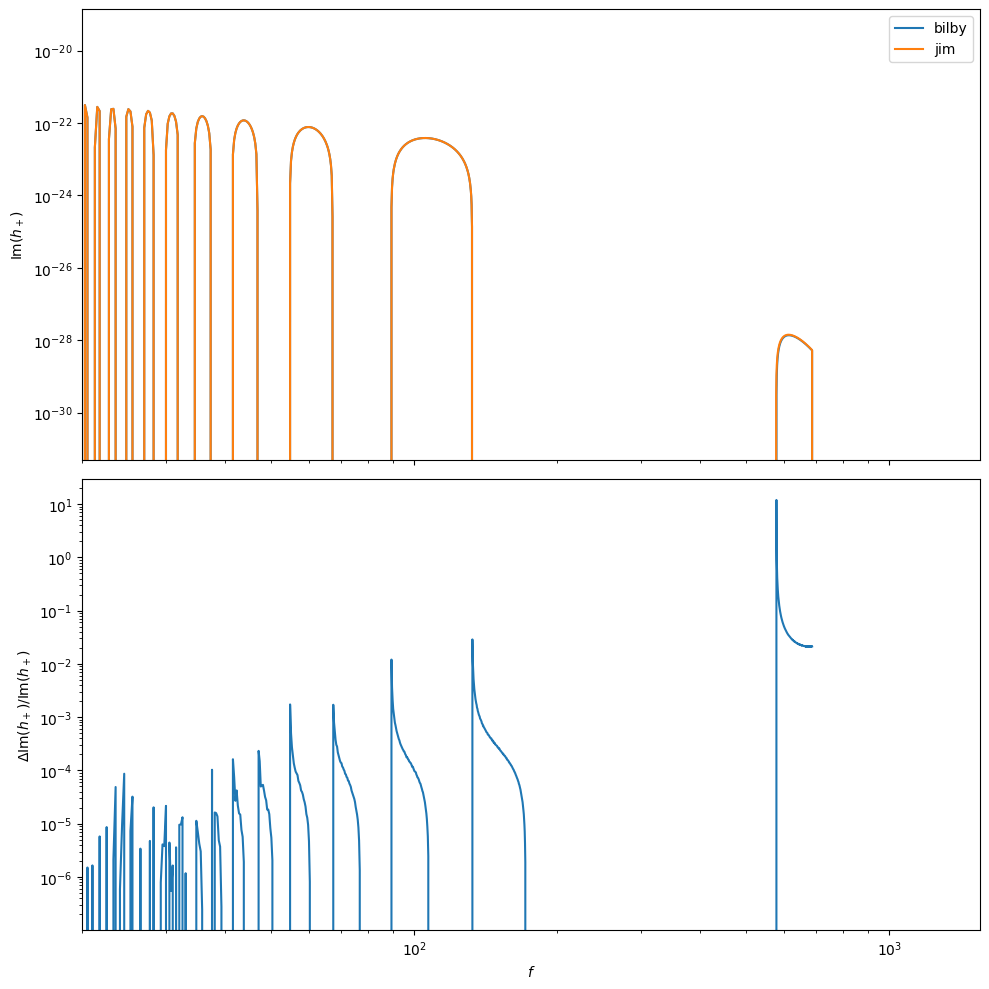

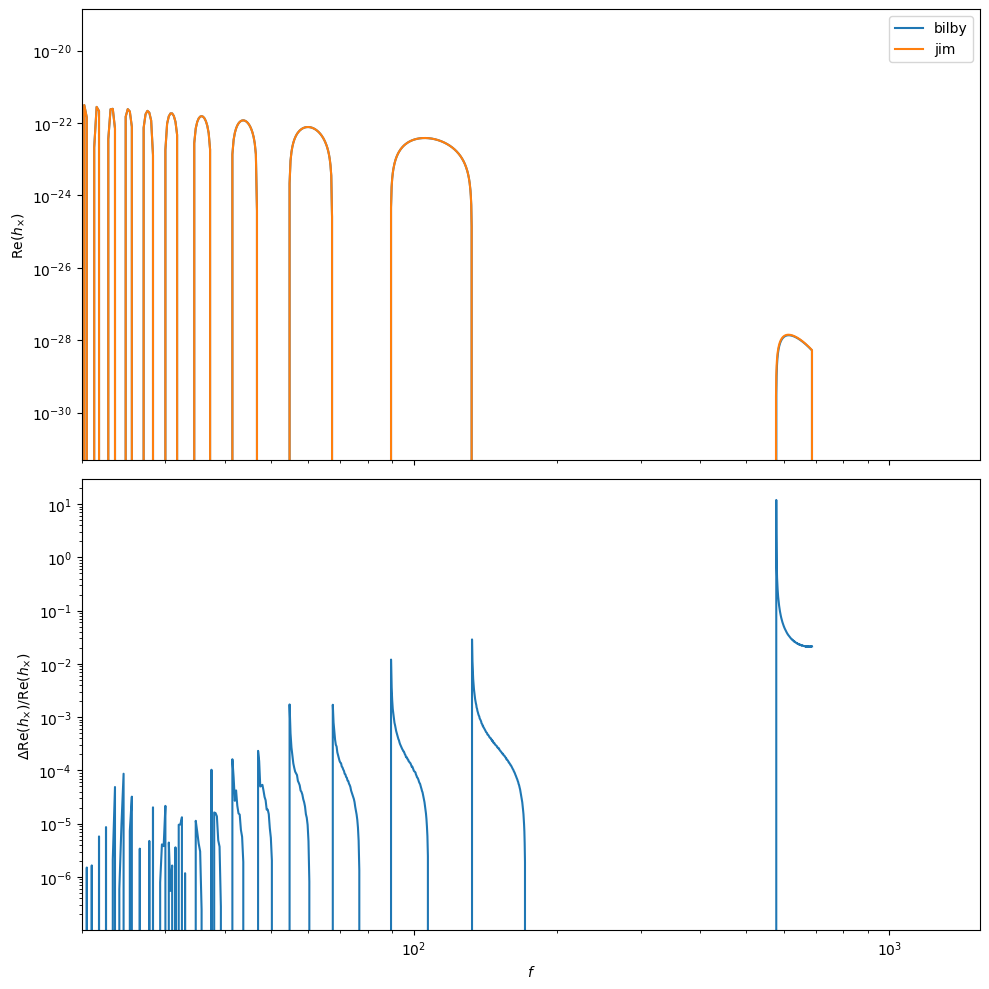

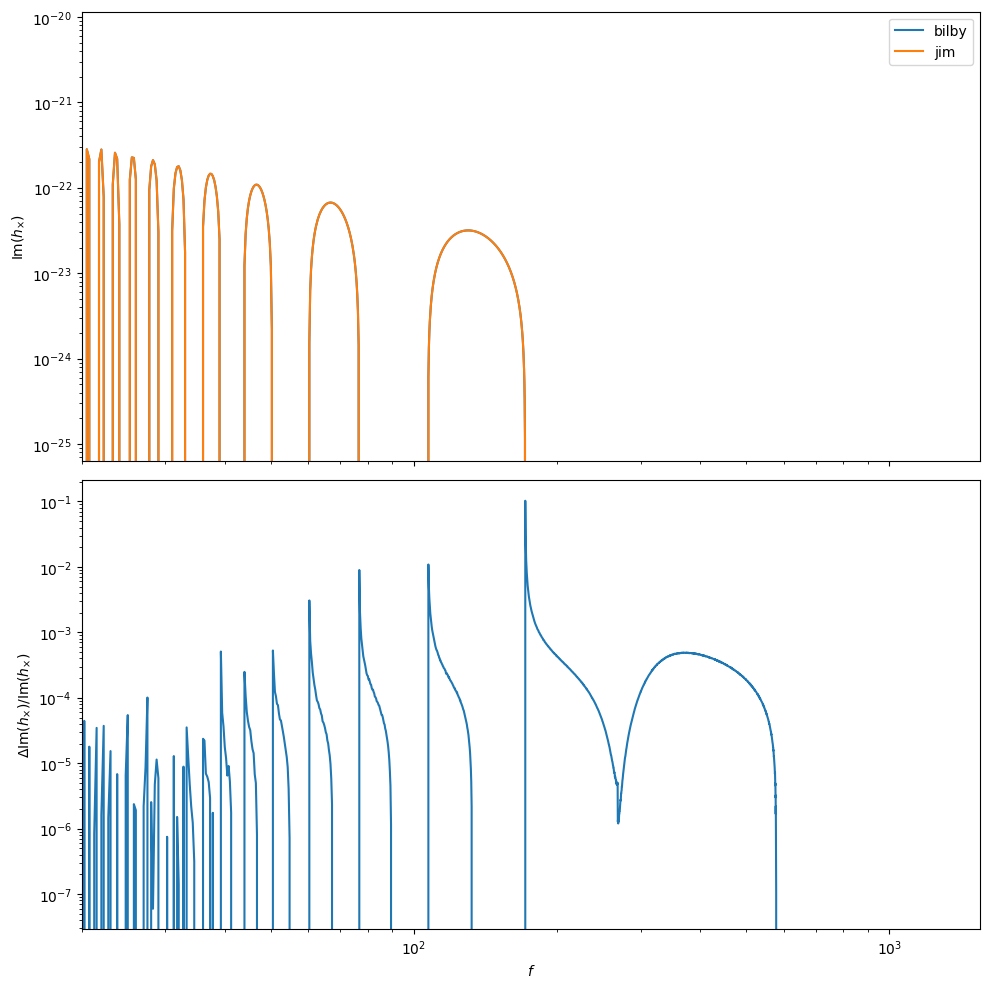

In [1]:
import bilby
from bilby.gw.waveform_generator import WaveformGenerator

reference_frequency = 20.0
fmin = 20.0
duration = 4.0
sampling_frequency = 2048.0

waveform_arguments = dict(
    waveform_approximant="IMRPhenomD",
    reference_frequency=reference_frequency,
    minimum_frequency=fmin,
)

waveform_generator = WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=waveform_arguments,
)
waveform_generator.parameters = {
    "mass_1": 30.0,
    "mass_2": 29.0,
    "a_1": 0.0,
    "a_2": 0.0,
    "tilt_1": 0.0,
    "tilt_2": 0.0,
    "phi_12": 0.0,
    "phi_jl": 0.0,
    "theta_jn": 0.0,
    "luminosity_distance": 100.0,
    "phase": 0.0,
}
w_bilby = waveform_generator.frequency_domain_strain()

import jax.numpy as jnp
from jimgw.single_event.waveform import RippleIMRPhenomD
from jimgw.single_event.utils import m1_m2_to_Mc_eta

Mc, eta = m1_m2_to_Mc_eta(waveform_generator.parameters["mass_1"], waveform_generator.parameters["mass_2"])
w_jim = RippleIMRPhenomD(f_ref=float(reference_frequency))(
    jnp.array(waveform_generator.frequency_array),
    {
        "M_c": Mc,
        "eta": eta,
        "s1_z": 0.0,
        "s2_z": 0.0,
        "iota": 0.0,
        "d_L": 100.0,
        "phase_c": 0.0,
    }
)

import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
axs[0].loglog(waveform_generator.frequency_array, w_bilby['plus'].real, label="bilby")
axs[0].loglog(waveform_generator.frequency_array, w_jim['p'].real, label="jim")
axs[0].set_ylabel("$\mathrm{Re}(h_+)$")
axs[0].legend()
axs[0].set_xlim(20)

axs[1].loglog(waveform_generator.frequency_array, (w_jim['p'].real - w_bilby['plus'].real)/w_bilby['plus'].real)
axs[1].set_xlim(20)
axs[1].set_xlabel("$f$")
axs[1].set_ylabel("$\Delta\mathrm{Re}(h_+)/\mathrm{Re}(h_+)$")
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
axs[0].loglog(waveform_generator.frequency_array, w_bilby['plus'].imag, label="bilby")
axs[0].loglog(waveform_generator.frequency_array, w_jim['p'].imag, label="jim")
axs[0].set_ylabel("$\mathrm{Im}(h_+)$")
axs[0].legend()
axs[0].set_xlim(20)

axs[1].loglog(waveform_generator.frequency_array, (w_jim['p'].imag - w_bilby['plus'].imag)/w_bilby['plus'].imag)
axs[1].set_xlim(20)
axs[1].set_xlabel("$f$")
axs[1].set_ylabel("$\Delta\mathrm{Im}(h_+)/\mathrm{Im}(h_+)$")
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
axs[0].loglog(waveform_generator.frequency_array, w_bilby['cross'].real, label="bilby")
axs[0].loglog(waveform_generator.frequency_array, w_jim['c'].real, label="jim")
axs[0].set_ylabel("$\mathrm{Re}(h_{\\times})$")
axs[0].legend()
axs[0].set_xlim(20)

axs[1].loglog(waveform_generator.frequency_array, (w_jim['c'].real - w_bilby['cross'].real)/w_bilby['cross'].real)
axs[1].set_xlim(20)
axs[1].set_xlabel("$f$")
axs[1].set_ylabel("$\Delta\mathrm{Re}(h_{\\times})/\mathrm{Re}(h_{\\times})$")
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
axs[0].loglog(waveform_generator.frequency_array, w_bilby['cross'].imag, label="bilby")
axs[0].loglog(waveform_generator.frequency_array, w_jim['c'].imag, label="jim")
axs[0].set_ylabel("$\mathrm{Im}(h_{\\times})$")
axs[0].legend()
axs[0].set_xlim(20)

axs[1].loglog(waveform_generator.frequency_array, (w_jim['c'].imag - w_bilby['cross'].imag)/w_bilby['cross'].imag)
axs[1].set_xlim(20)
axs[1].set_xlabel("$f$")
axs[1].set_ylabel("$\Delta\mathrm{Im}(h_{\\times})/\mathrm{Im}(h_{\\times})$")
plt.tight_layout()
plt.show()

22:01 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


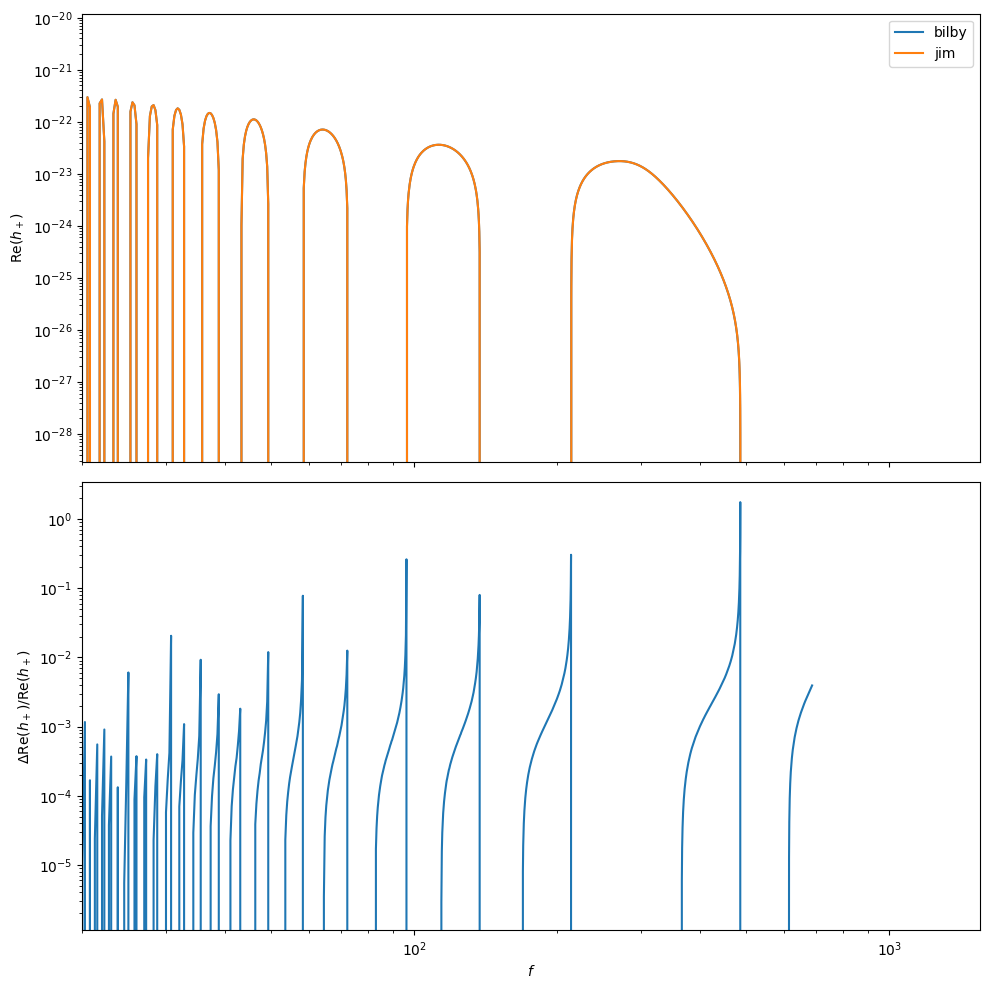

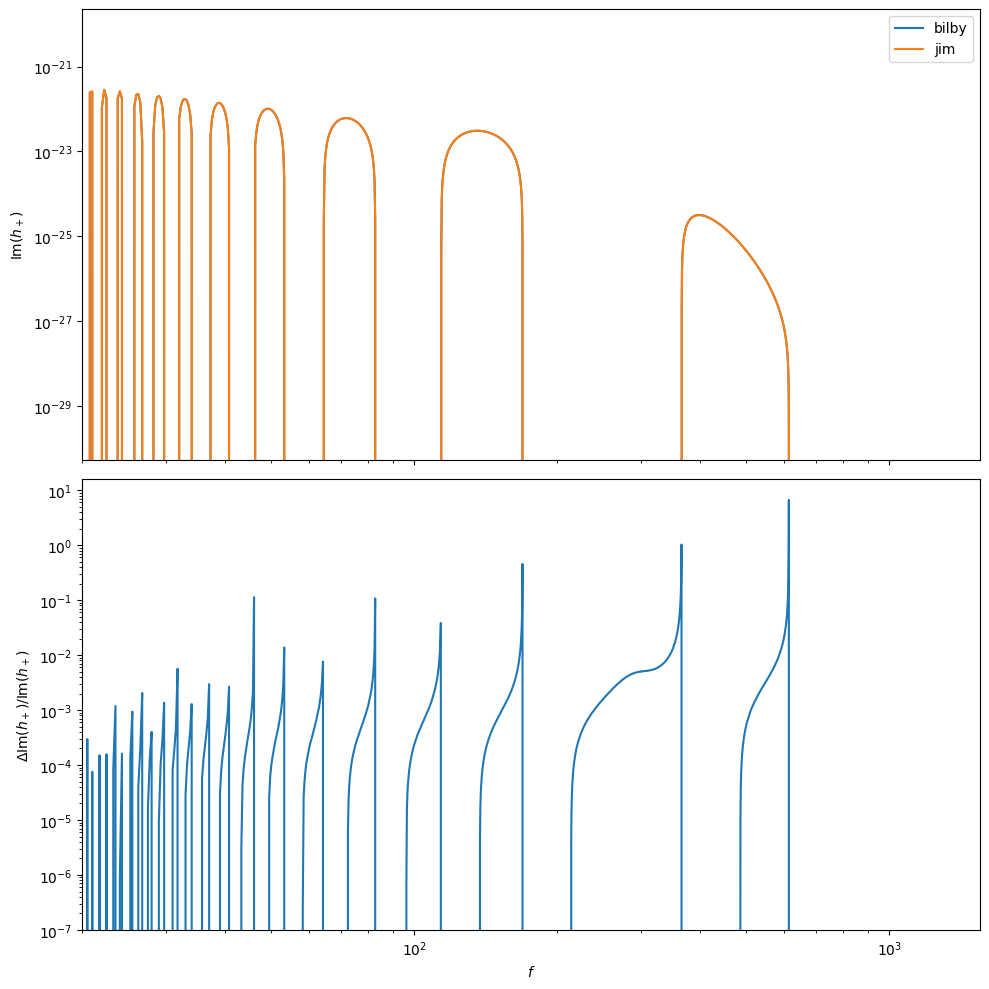

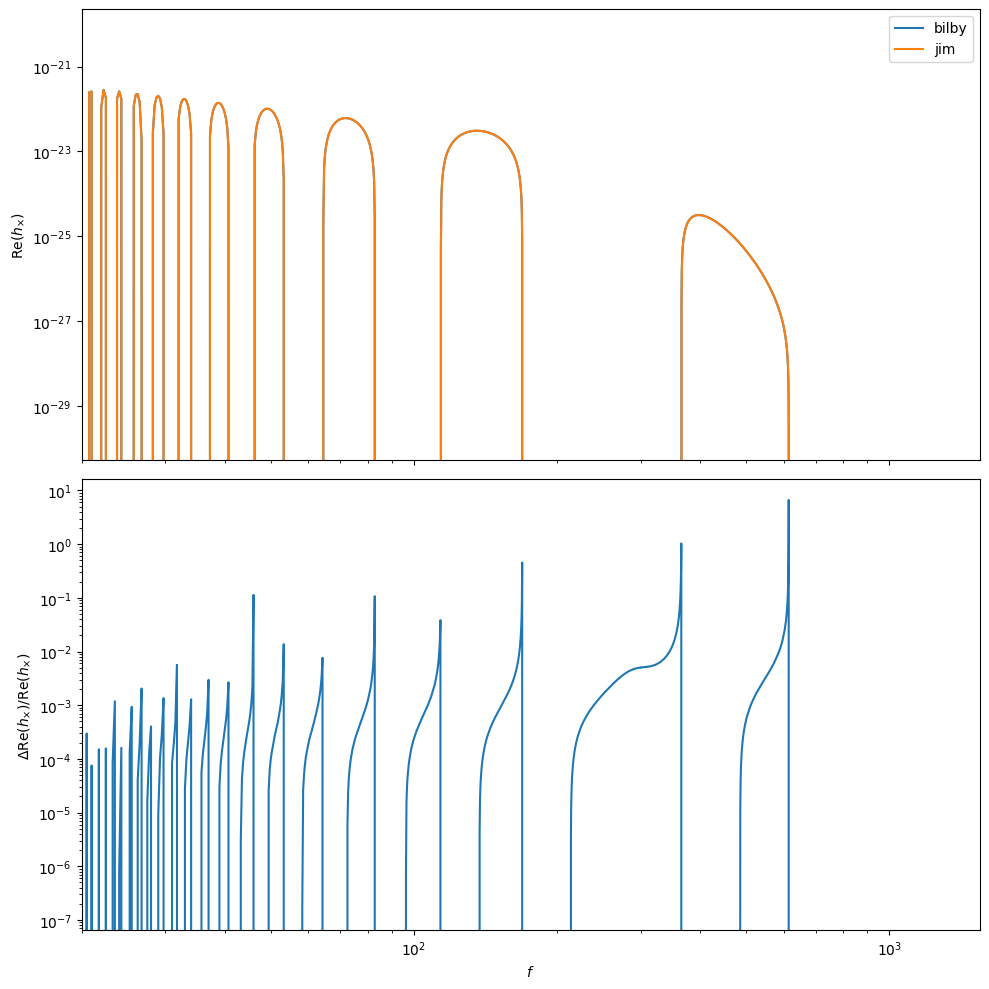

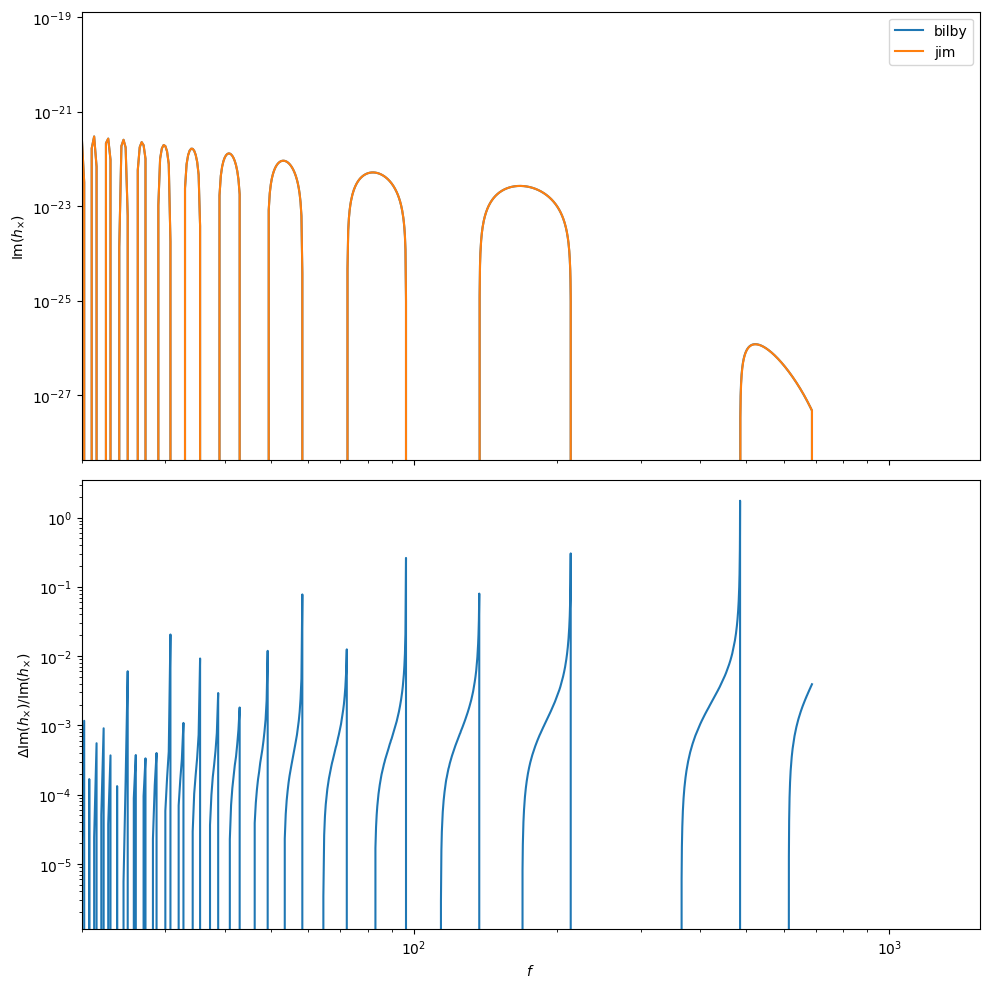

In [2]:
import bilby
from bilby.gw.waveform_generator import WaveformGenerator

reference_frequency = 20.0
fmin = 20.0
duration = 4.0
sampling_frequency = 2048.0

waveform_arguments = dict(
    waveform_approximant="IMRPhenomPv2",
    reference_frequency=reference_frequency,
    minimum_frequency=fmin,
)

waveform_generator = WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=waveform_arguments,
)
waveform_generator.parameters = {
    "mass_1": 30.0,
    "mass_2": 29.0,
    "a_1": 0.0,
    "a_2": 0.0,
    "tilt_1": 0.0,
    "tilt_2": 0.0,
    "phi_12": 0.0,
    "phi_jl": 0.0,
    "theta_jn": 0.0,
    "luminosity_distance": 100.0,
    "phase": 0.0,
}
w_bilby = waveform_generator.frequency_domain_strain()

import jax.numpy as jnp
from jimgw.single_event.waveform import RippleIMRPhenomPv2
from jimgw.single_event.utils import m1_m2_to_Mc_eta

Mc, eta = m1_m2_to_Mc_eta(waveform_generator.parameters["mass_1"], waveform_generator.parameters["mass_2"])
w_jim = RippleIMRPhenomPv2(f_ref=float(reference_frequency))(
    jnp.array(waveform_generator.frequency_array),
    {
        "M_c": Mc,
        "eta": eta,
        "s1_x": 0.0,
        "s1_y": 0.0,
        "s1_z": 0.0,
        "s2_x": 0.0,
        "s2_y": 0.0,
        "s2_z": 0.0,
        "iota": 0.0,
        "d_L": 100.0,
        "phase_c": 0.0,
    }
)

import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
axs[0].loglog(waveform_generator.frequency_array, w_bilby['plus'].real, label="bilby")
axs[0].loglog(waveform_generator.frequency_array, w_jim['p'].real, label="jim")
axs[0].set_ylabel("$\mathrm{Re}(h_+)$")
axs[0].legend()
axs[0].set_xlim(20)

axs[1].loglog(waveform_generator.frequency_array, (w_jim['p'].real - w_bilby['plus'].real)/w_bilby['plus'].real)
axs[1].set_xlim(20)
axs[1].set_xlabel("$f$")
axs[1].set_ylabel("$\Delta\mathrm{Re}(h_+)/\mathrm{Re}(h_+)$")
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
axs[0].loglog(waveform_generator.frequency_array, w_bilby['plus'].imag, label="bilby")
axs[0].loglog(waveform_generator.frequency_array, w_jim['p'].imag, label="jim")
axs[0].set_ylabel("$\mathrm{Im}(h_+)$")
axs[0].legend()
axs[0].set_xlim(20)

axs[1].loglog(waveform_generator.frequency_array, (w_jim['p'].imag - w_bilby['plus'].imag)/w_bilby['plus'].imag)
axs[1].set_xlim(20)
axs[1].set_xlabel("$f$")
axs[1].set_ylabel("$\Delta\mathrm{Im}(h_+)/\mathrm{Im}(h_+)$")
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
axs[0].loglog(waveform_generator.frequency_array, w_bilby['cross'].real, label="bilby")
axs[0].loglog(waveform_generator.frequency_array, w_jim['c'].real, label="jim")
axs[0].set_ylabel("$\mathrm{Re}(h_{\\times})$")
axs[0].legend()
axs[0].set_xlim(20)

axs[1].loglog(waveform_generator.frequency_array, (w_jim['c'].real - w_bilby['cross'].real)/w_bilby['cross'].real)
axs[1].set_xlim(20)
axs[1].set_xlabel("$f$")
axs[1].set_ylabel("$\Delta\mathrm{Re}(h_{\\times})/\mathrm{Re}(h_{\\times})$")
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
axs[0].loglog(waveform_generator.frequency_array, w_bilby['cross'].imag, label="bilby")
axs[0].loglog(waveform_generator.frequency_array, w_jim['c'].imag, label="jim")
axs[0].set_ylabel("$\mathrm{Im}(h_{\\times})$")
axs[0].legend()
axs[0].set_xlim(20)

axs[1].loglog(waveform_generator.frequency_array, (w_jim['c'].imag - w_bilby['cross'].imag)/w_bilby['cross'].imag)
axs[1].set_xlim(20)
axs[1].set_xlabel("$f$")
axs[1].set_ylabel("$\Delta\mathrm{Im}(h_{\\times})/\mathrm{Im}(h_{\\times})$")
plt.tight_layout()
plt.show()